<center><b> Task 1 </b></center>

### Community Discovery

> *Identify, evaluate and validate the modular structure of the crawled network sample. The results of at least 3 CD algorithms (e.g., K-clique, Label Propagation, Louvain, Infomap, Demon/Angel) must be evaluated and compared. If additional semantic information for the analysed graph are available use them to make sense of the identified partitions. For CD algorithm implementations (as well as for their evaluation and comparison) refer to the CDlib (https://github.com/GiulioRossetti/cdlib) library. The analysis can be extended selecting approaches considered interesting among the one present in such library.*

Algorithms tested among the [list](https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/node_clustering.html):
- [Label propagation](https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/algs/cdlib.algorithms.label_propagation.html#cdlib.algorithms.label_propagation)
- [K-clique](https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/algs/cdlib.algorithms.kclique.html#cdlib.algorithms.kclique)
- [Angel](https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/algs/cdlib.algorithms.angel.html#cdlib.algorithms.angel)
- [Mod m](https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/algs/cdlib.algorithms.mod_m.html#cdlib.algorithms.mod_m)
- [SCAN (Structural Clustering Algorithm for Networks)](https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/algs/cdlib.algorithms.scan.html#cdlib.algorithms.scan)


In [1]:
import pandas as pd
import csv
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')
from cdlib import algorithms, viz, evaluation

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'graph_tool', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [52]:
g = nx.read_edgelist("Links.csv", delimiter=",", nodetype=int) #graph

### 1) Label propagation

In [3]:
lp = algorithms.label_propagation(g)
over='Communities overlap'
if lp.overlap == False:
    over='Communities don\'t overlap'    
print('INFORMATION:\n Algorithm used: {},\n Number of communites: {},\n {},\n Coverage: {}'.format( lp.method_name, len(lp.communities), over, lp.node_coverage))

INFORMATION:
 Algorithm used: Label Propagation,
 Number of communites: 105,
 Communities don't overlap,
 Coverage: 1.0


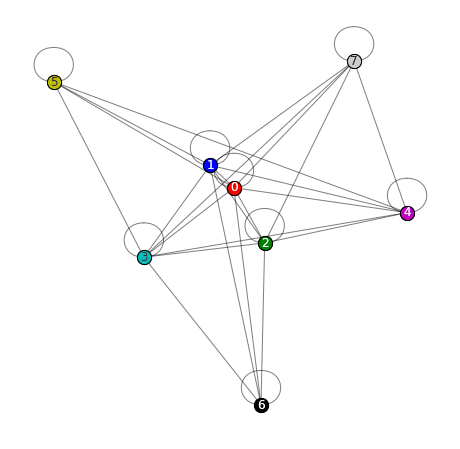

In [4]:
viz.plot_community_graph(g, lp, top_k=8, plot_labels=True)

In [33]:
lp.size(summary=False)

[14501,
 9277,
 3369,
 1485,
 773,
 529,
 455,
 405,
 228,
 72,
 60,
 12,
 8,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [64]:
lp.average_internal_degree(summary=False)

[12.12412937038825,
 45.65743235959901,
 4.313446126447017,
 2.1427609427609426,
 1.9974126778783958,
 2.01890359168242,
 2.246153846153846,
 2.0296296296296297,
 1.9912280701754386,
 1.9722222222222223,
 6.2,
 1.8333333333333333,
 1.25,
 1.6666666666666667,
 1.6666666666666667,
 1.6,
 2.4,
 1.2,
 1.5,
 1.5,
 1.5,
 1.3333333333333333,
 1.3333333333333333,
 2.0,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [66]:
lp.internal_edge_density(summary=False)

[0.0008361468531302241,
 0.004922103531651467,
 0.0012807144080899694,
 0.0014439089910788024,
 0.00258732212160414,
 0.0038236810448530677,
 0.00494747543205693,
 0.005023835716905024,
 0.008771929824561403,
 0.027777777777777776,
 0.10508474576271186,
 0.16666666666666666,
 0.17857142857142858,
 0.3333333333333333,
 0.3333333333333333,
 0.4,
 0.6,
 0.3,
 0.5,
 0.5,
 0.5,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,


In [67]:
lp.hub_dominance(summary=False)

[0.19710344827586207,
 0.24353169469598965,
 0.7004156769596199,
 0.9966307277628033,
 0.9974093264248705,
 1.0,
 0.9845814977973568,
 0.995049504950495,
 1.0,
 1.0,
 0.6440677966101694,
 1.0,
 0.2857142857142857,
 1.0,
 1.0,
 0.75,
 1.0,
 0.5,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [70]:
d = {}
for i in range (1,38):
    if lp.to_node_community_map()[i][0] not in d:
        d[lp.to_node_community_map()[i][0]] = 1
    else:
        d[lp.to_node_community_map()[i][0]] = d[lp.to_node_community_map()[i][0]] + 1
    print(i, lp.to_node_community_map()[i])

1 [1]
2 [0]
3 [0]
4 [0]
5 [5]
6 [1]
7 [1]
8 [4]
9 [0]
10 [0]
11 [2]
12 [8]
13 [3]
14 [9]
15 [0]
16 [1]
17 [1]
18 [0]
19 [2]
20 [0]
21 [7]
22 [1]
23 [1]
24 [0]
25 [0]
26 [0]
27 [0]
28 [1]
29 [1]
30 [0]
31 [0]
32 [0]
33 [6]
34 [0]
35 [0]
36 [0]
37 [0]


In [63]:
d

{1: 9, 0: 19, 5: 1, 4: 1, 2: 2, 8: 1, 3: 1, 9: 1, 7: 1, 6: 1}

### 2) K-clique

In [72]:
kc = algorithms.kclique(g, k=9)
over='Communities overlap'
if kc.overlap == False:
    over='Communities don\'t overlap'    
print('INFORMATION:\n Algorithm used: {},\n Number of communites: {},\n {},\n Coverage: {}'.format(kc.method_name, len(kc.communities), over, kc.node_coverage))

INFORMATION:
 Algorithm used: Klique,
 Number of communites: 186,
 Communities overlap,
 Coverage: 0.04077212206154042


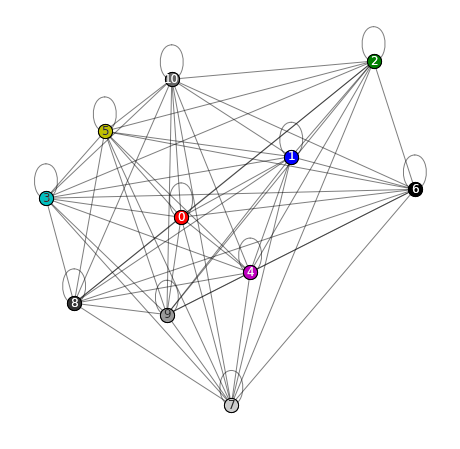

In [73]:
viz.plot_community_graph(g, kc,min_size=12, plot_labels=True)

In [74]:
kc.size(summary=False)

[716,
 471,
 20,
 15,
 14,
 13,
 13,
 13,
 13,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

In [56]:
for i in range (1,38): #14
    print(i, kc.to_node_community_map()[i])

1 [0, 1, 20, 52, 141, 168]
2 [1]
3 [1, 28, 33, 184]
4 [1, 11, 28]
5 []
6 []
7 [0, 12, 13, 29, 30, 31, 75, 76, 77, 78]
8 []
9 []
10 [1, 14, 32, 33, 79]
11 [1, 34]
12 []
13 []
14 []
15 [0, 1, 80]
16 []
17 [0, 4, 5, 15, 16, 17, 35, 36, 37, 38, 39, 40, 41, 42, 43, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
18 [1, 113]
19 [1]
20 [1, 32, 44, 113, 114]
21 []
22 [0, 1, 9, 45, 46, 115, 116, 117, 118, 119]
23 [1, 2, 14, 47]
24 [1]
25 [1, 2, 6, 14, 18, 32, 33, 47, 48, 49]
26 [1, 44]
27 []
28 [0, 7]
29 []
30 [1, 2, 14, 32, 33, 47, 48, 49, 50, 114, 120]
31 []
32 [1]
33 []
34 [1]
35 []
36 [1, 2, 19, 48, 49, 50, 114, 120, 121, 122, 123]
37 [34]


In [75]:
kc.average_internal_degree(summary=False)

[84.00558659217877,
 57.040339702760086,
 14.7,
 12.4,
 10.857142857142858,
 10.76923076923077,
 10.615384615384615,
 10.461538461538462,
 10.923076923076923,
 10.166666666666666,
 10.166666666666666,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.636363636363637,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.636363636363637,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.454545454545455,
 9.636363636363637,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.

In [76]:
kc.internal_edge_density(summary=False)

[0.11749033089815213,
 0.12136242489948955,
 0.7736842105263158,
 0.8857142857142857,
 0.8351648351648352,
 0.8974358974358975,
 0.8846153846153846,
 0.8717948717948718,
 0.9102564102564102,
 0.9242424242424242,
 0.9242424242424242,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9636363636363636,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9636363636363636,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9454545454545454,
 0.9636363636363636,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.97777777

In [77]:
kc.hub_dominance(summary=False)

[0.5972027972027972,
 0.676595744680851,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,

### 3) Angel

In [7]:
angel = algorithms.angel(g, min_community_size=10, threshold=0.30)
over='Communities overlap'
if angel.overlap == False:
    over='Communities don\'t overlap'    
print('INFORMATION:\n Algorithm used: {},\n Number of communites: {},\n {},\n Coverage: {}'.format(angel.method_name, len(angel.communities), over, angel.node_coverage))

INFORMATION:
 Algorithm used: ANGEL,
 Number of communites: 3,
 Communities overlap,
 Coverage: 0.5950310953166645


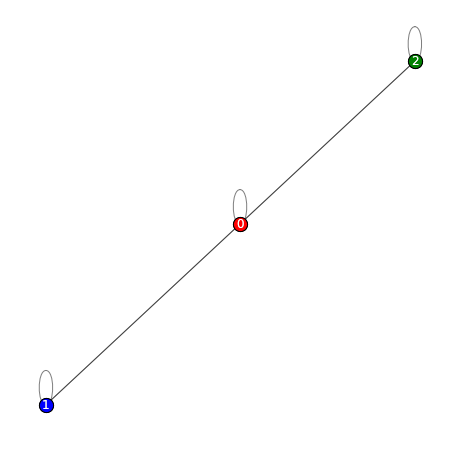

In [8]:
viz.plot_community_graph(g, angel,  plot_labels=True)

In [9]:
angel.size(summary=False)

[18623, 16, 10]

In [46]:
for i in range (1,38):
    print(i, angel.to_node_community_map()[i])

1 [0]
2 [0]
3 [0]
4 [0]
5 [0]
6 [0]
7 [0]
8 [0]
9 [0]
10 [0]
11 [0, 0]
12 [0]
13 [0, 1, 2]
14 [0]
15 [0]
16 [0]
17 [0]
18 [0]
19 [0]
20 [0]
21 [0]
22 [0]
23 [0]
24 [0]
25 [0]
26 [0]
27 [0]
28 [0]
29 [0]
30 [0]
31 [0]
32 [0]
33 [0]
34 [0]
35 [0]
36 [0]
37 [0]


In [97]:
angel.average_internal_degree(summary=False)

[33.59684261397197, 1.875, 2.2]

In [98]:
angel.internal_edge_density(summary=False)

[0.0018041479225632032, 0.125, 0.24444444444444444]

In [99]:
angel.hub_dominance(summary=False)

[0.13859950596069165, 1.0, 1.0]

### 4) SCAN (Structural Clustering Algorithm for Networks)

In [53]:
scan_c = algorithms.scan(g, epsilon=0.3, mu=3)
over='Communities overlap'
if scan_c.overlap == False:
    over='Communities don\'t overlap'    
print('INFORMATION:\n Algorithm used: {},\n Number of communites: {},\n {},\n Coverage: {}'.format(scan_c.method_name, len(scan_c.communities), over, scan_c.node_coverage))

INFORMATION:
 Algorithm used: SCAN,
 Number of communites: 326,
 Communities don't overlap,
 Coverage: 0.09170542141810537


In [110]:
#pos = nx.spring_layout(g)
viz.plot_community_graph(g,nx.spring_layout(g), scan_c, min_size=15, plot_labels=True)

KeyboardInterrupt: 

In [102]:
scan_c.size(summary=False)

[421,
 183,
 172,
 90,
 61,
 59,
 56,
 42,
 29,
 24,
 22,
 21,
 20,
 18,
 18,
 17,
 16,
 14,
 14,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 

In [55]:
for i in range (1,38):
    print(i, scan_c.to_node_community_map()[i])

1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 [130]
11 []
12 []
13 []
14 []
15 [33]
16 []
17 [2]
18 [130]
19 []
20 [130]
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 [130]
31 []
32 []
33 []
34 [130]
35 []
36 []
37 []


In [95]:
scan_c.average_internal_degree(summary=False)

[2.5558194774346794,
 39.19125683060109,
 33.36046511627907,
 26.57777777777778,
 3.0163934426229506,
 7.4576271186440675,
 2.3214285714285716,
 11.80952380952381,
 2.0,
 2.0833333333333335,
 2.272727272727273,
 2.0952380952380953,
 2.3,
 2.2222222222222223,
 3.111111111111111,
 1.8823529411764706,
 2.125,
 2.0,
 1.8571428571428572,
 2.1538461538461537,
 2.3333333333333335,
 2.0,
 7.0,
 1.8181818181818181,
 2.1818181818181817,
 2.0,
 1.8181818181818181,
 1.8,
 1.8,
 1.8,
 6.8,
 2.0,
 2.0,
 6.0,
 1.8,
 1.8,
 2.0,
 2.2222222222222223,
 1.7777777777777777,
 2.888888888888889,
 4.444444444444445,
 2.4444444444444446,
 2.0,
 3.111111111111111,
 2.0,
 1.75,
 2.25,
 2.5,
 2.5,
 2.25,
 1.75,
 2.0,
 2.75,
 1.75,
 2.0,
 1.75,
 2.2857142857142856,
 2.2857142857142856,
 1.7142857142857142,
 3.142857142857143,
 2.2857142857142856,
 1.7142857142857142,
 1.7142857142857142,
 2.2857142857142856,
 1.7142857142857142,
 3.4285714285714284,
 2.0,
 1.7142857142857142,
 2.857142857142857,
 1.714285714285714

In [101]:
scan_c.internal_edge_density(summary=False)

[0.00608528447008257,
 0.2153365759923137,
 0.19509043927648578,
 0.29862671660424467,
 0.05027322404371585,
 0.12857977790765635,
 0.04220779220779221,
 0.2880371660859466,
 0.07142857142857142,
 0.09057971014492754,
 0.10822510822510822,
 0.10476190476190476,
 0.12105263157894737,
 0.13071895424836602,
 0.1830065359477124,
 0.11764705882352941,
 0.14166666666666666,
 0.15384615384615385,
 0.14285714285714285,
 0.1794871794871795,
 0.21212121212121213,
 0.18181818181818182,
 0.6363636363636364,
 0.18181818181818182,
 0.21818181818181817,
 0.2,
 0.18181818181818182,
 0.2,
 0.2,
 0.2,
 0.7555555555555555,
 0.2222222222222222,
 0.2222222222222222,
 0.6666666666666666,
 0.2,
 0.2,
 0.25,
 0.2777777777777778,
 0.2222222222222222,
 0.3611111111111111,
 0.5555555555555556,
 0.3055555555555556,
 0.25,
 0.3888888888888889,
 0.25,
 0.25,
 0.32142857142857145,
 0.35714285714285715,
 0.35714285714285715,
 0.32142857142857145,
 0.25,
 0.2857142857142857,
 0.39285714285714285,
 0.25,
 0.28571428571

In [100]:
scan_c.hub_dominance(summary=False)

[0.030952380952380953,
 0.6923076923076923,
 0.4619883040935672,
 0.6629213483146067,
 0.18333333333333332,
 0.5862068965517241,
 0.2545454545454545,
 0.5609756097560976,
 0.17857142857142858,
 0.2608695652173913,
 0.38095238095238093,
 0.45,
 0.5263157894736842,
 0.29411764705882354,
 0.47058823529411764,
 0.375,
 0.4666666666666667,
 0.38461538461538464,
 0.38461538461538464,
 0.4166666666666667,
 0.5454545454545454,
 0.36363636363636365,
 1.0,
 0.4,
 0.6,
 0.7,
 0.6,
 0.7777777777777778,
 0.3333333333333333,
 0.4444444444444444,
 0.8888888888888888,
 0.4444444444444444,
 0.4444444444444444,
 0.8888888888888888,
 0.6666666666666666,
 0.6666666666666666,
 0.625,
 0.5,
 0.75,
 0.875,
 1.0,
 0.75,
 0.75,
 1.0,
 0.625,
 0.8571428571428571,
 0.5714285714285714,
 0.7142857142857143,
 0.7142857142857143,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.7142857142857143,
 0.5714285714285714,
 0.7142857142857143,
 0.42857142857142855,
 0.6666666666666666,
 0.8333333333333334,

## Internal evaluation 

#### Fitness scores

In [82]:
print('-------------------------------------Label_Propagation--------------K_clique--------------Angel---------------SCAN----')
print('Communities:                             {}                          {}                   {}                   {}'.format(len(lp.communities),len(kc.communities),len(angel.communities),len(scan_c.communities)))
print('-----------------------------------------------------------------------------------------------------------------------')
print('Avg_dimension:                           {}                       {}               {}              {}'.format(round(lp.size()[2], 2),round(kc.size()[2], 2),round(angel.size()[2], 2),round(scan_c.size()[2], 2)))
print('Avg_dimension_std:                       {}                      {}                {}                 {}'.format(round(lp.size()[3], 2),round(kc.size()[3], 2),round(angel.size()[3], 2),round(scan_c.size()[3], 2)))
print('-----------------------------------------------------------------------------------------------------------------------')
print('Avg_internal_degree:                     {}                         {}                 {}               {}'.format(round(lp.average_internal_degree()[2],2),round(kc.average_internal_degree()[2],2),round(angel.average_internal_degree()[2],2),round(scan_c.average_internal_degree()[2],2)))
print('Avg_internal_degree_std:                 {}                         {}                 {}                 {}'.format(round(lp.average_internal_degree()[3],2),round(kc.average_internal_degree()[3],2),round(angel.average_internal_degree()[3],2),round(scan_c.average_internal_degree()[3],2)))
print('-----------------------------------------------------------------------------------------------------------------------')
print('Avg_edge_density:                        {}                           {}                {}                 {}'.format(round(lp.internal_edge_density()[2],2),round(kc.internal_edge_density()[2],2),round(angel.internal_edge_density()[2],2),round(scan_c.internal_edge_density()[2],2)))
print('Avg_edge_density_std:                    {}                          {}                {}                 {}'.format(round(lp.internal_edge_density()[3],2),round(kc.internal_edge_density()[3],2),round(angel.internal_edge_density()[3],2),round(scan_c.internal_edge_density()[3],2)))
print('-----------------------------------------------------------------------------------------------------------------------')
print('Avg_size:                               {}                        {}              {}               {}'.format(round(lp.size()[2],2),round(kc.size()[2],2),round(angel.size()[2],2),round(scan_c.size()[2],2)))
print('Avg_size_std:                           {}                       {}               {}                  {}'.format(round(lp.size()[3],2),round(kc.size()[3],2),round(angel.size()[3],2),round(scan_c.size()[3],2)))
print('-----------------------------------------------------------------------------------------------------------------------')
print('Hub_dominance:                           {}                         {}                 {}                  {}'.format(round(lp.hub_dominance()[2],2),round(kc.hub_dominance()[2],2),round(angel.hub_dominance()[2],2),round(scan_c.hub_dominance()[2],2)))
print('Hub_dominance_std:                       {}                         {}                 {}                  {}'.format(round(lp.hub_dominance()[3],2),round(kc.hub_dominance()[3],2),round(angel.hub_dominance()[3],2),round(scan_c.hub_dominance()[3],2)))
print('-----------------------------------------------------------------------------------------------------------------------')
#print('Avg_distance:                           {}                          {}                  {}                 {}'.format(round(lp.avg_distance()[2],2),round(kc.avg_distance()[2],2),round(angel.avg_distance()[2],2),round(scan_c.avg_distance()[2],2)))
#print('Avg_distance:                           {}                          {}                  {}                 {}'.format(round(lp.avg_distance()[3],2),round(kc.avg_distance()[3],2),round(angel.avg_distance()[3],2),round(scan_c.avg_distance()[3],2)))
#print('-----------------------------------------------------------------------------------------------------------------------')


-------------------------------------Label_Propagation--------------K_clique--------------Angel---------------SCAN----
Communities:                             105                          186                   3                   326
-----------------------------------------------------------------------------------------------------------------------
Avg_dimension:                           298.99                       15.96               6216.33              8.83
Avg_dimension_std:                       1695.43                      61.55                8772.84                 27.62
-----------------------------------------------------------------------------------------------------------------------
Avg_internal_degree:                     1.79                         9.17                 12.56               2.16
Avg_internal_degree_std:                 4.48                         6.6                 14.88                 3.16
-------------------------------------------------------

#### Modularity score based measures

In [61]:
print('-------------------------------------Label_Propagation--------------K_clique--------------Angel---------------SCAN----')
print('Erdos_renyi_modularity:               {}                           {}                     {}                 {}'.format(round(lp.erdos_renyi_modularity()[2],2),round(kc.erdos_renyi_modularity()[2],2),round(angel.erdos_renyi_modularity()[2],2),round(scan_c.erdos_renyi_modularity()[2],2)))
print('Newman_Girvan:                         {}                          {}                     {}                 {}'.format(round(lp.newman_girvan_modularity()[2],2),round(kc.newman_girvan_modularity()[2],2),round(angel.newman_girvan_modularity()[2],2),round(scan_c.newman_girvan_modularity()[2],2)))
print('Modularity_density:                   {}                        {}                   {}             {}'.format(round(lp.modularity_density()[2],2),round(kc.modularity_density()[2],2),round(angel.modularity_density()[2],2),round(scan_c.modularity_density()[2],2)))

-------------------------------------Label_Propagation--------------K_clique--------------Angel---------------SCAN----
Erdos_renyi_modularity:               0.42                           0.12                     0.39                 0.03
Newman_Girvan:                         0.32                          -0.01                     -0.16                 -0.01
Modularity_density:                   0.11                        -116096.7                   -372.9             -7008.77


In [27]:
evaluation.overlapping_normalized_mutual_information_MGH(angel,scan_c)

MatchingResult(score=0.024517963437055482, std=None)

In [29]:
evaluation.overlapping_normalized_mutual_information_MGH(lp,scan_c)

MatchingResult(score=0.009746674733097814, std=None)

In [30]:
evaluation.overlapping_normalized_mutual_information_MGH(lp,kc)

MatchingResult(score=0.004041928539493116, std=None)

In [111]:
evaluation.overlapping_normalized_mutual_information_MGH(lp,angel)

MatchingResult(score=0.015833173657479962, std=None)

## Exsternal evaluation

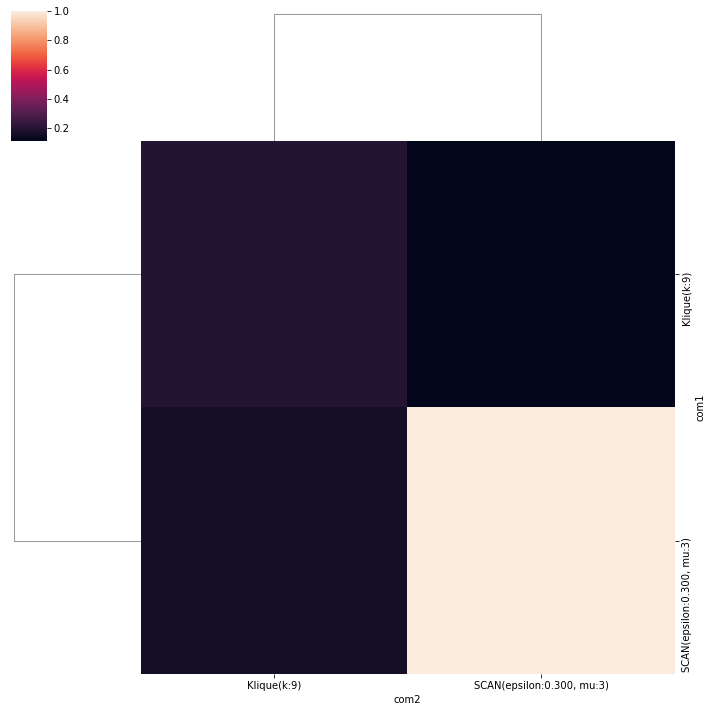

In [84]:
viz.plot_sim_matrix([kc,scan_c],evaluation.f1)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

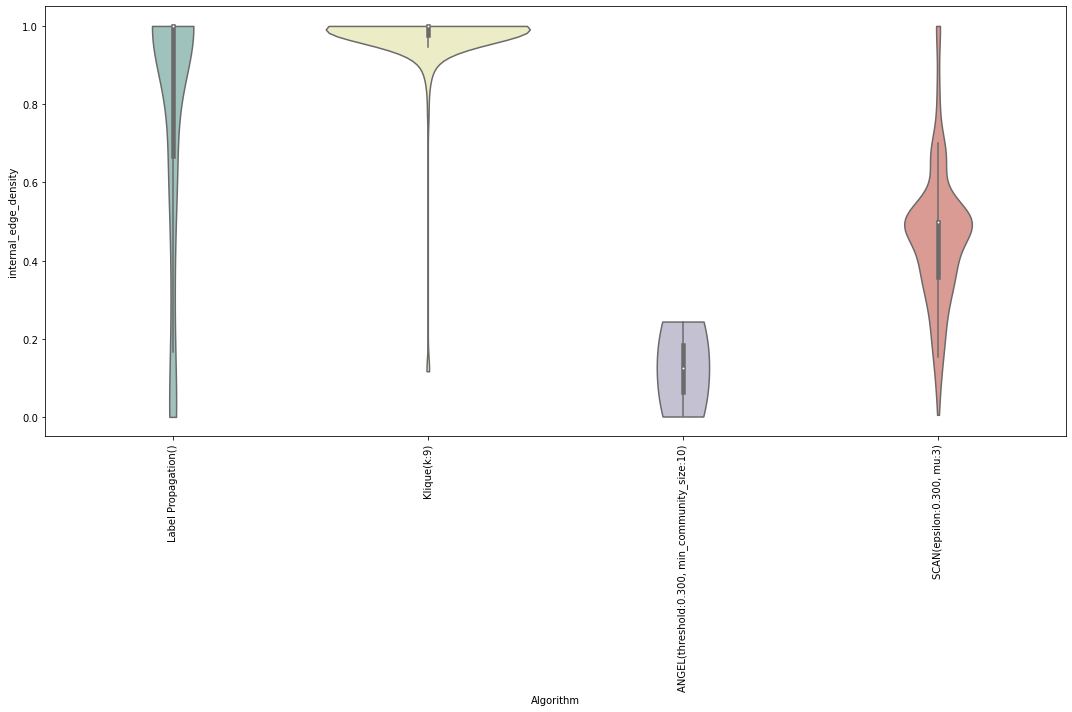

In [78]:
plt.figure(figsize=(15, 10))
viz.plot_com_stat([lp, kc, angel, scan_c], evaluation.internal_edge_density)

<AxesSubplot:xlabel='Algorithm', ylabel='hub_dominance'>

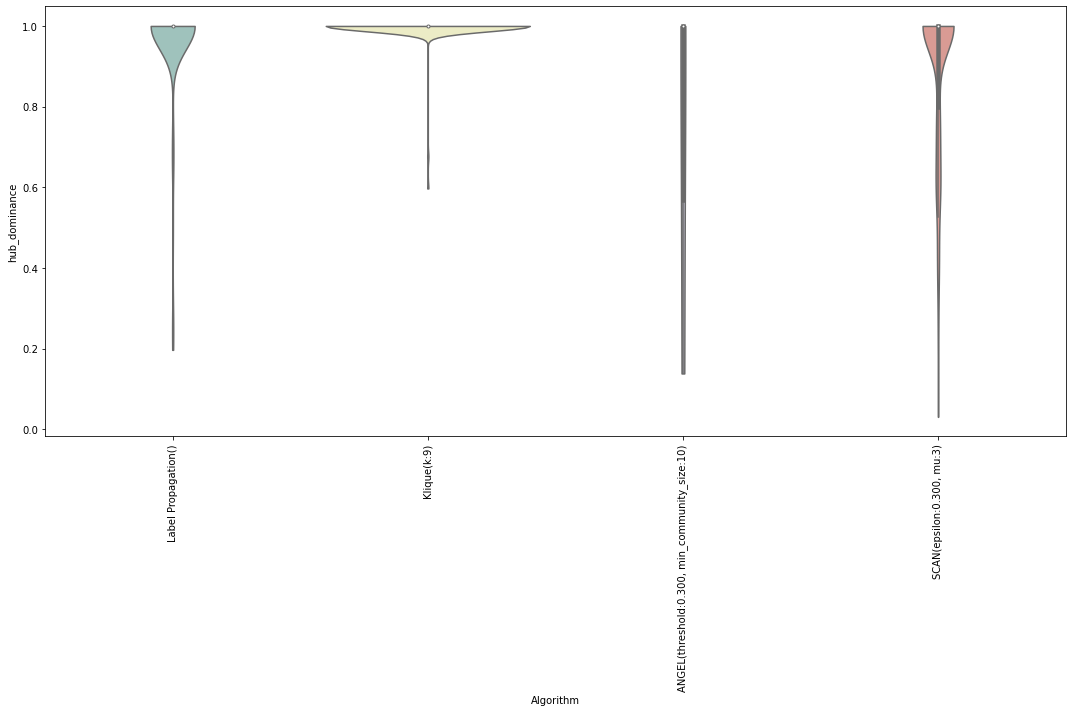

In [89]:
plt.figure(figsize=(15, 10))
viz.plot_com_stat([lp, kc, angel, scan_c], evaluation.hub_dominance)

<AxesSubplot:xlabel='Algorithm', ylabel='average_internal_degree'>

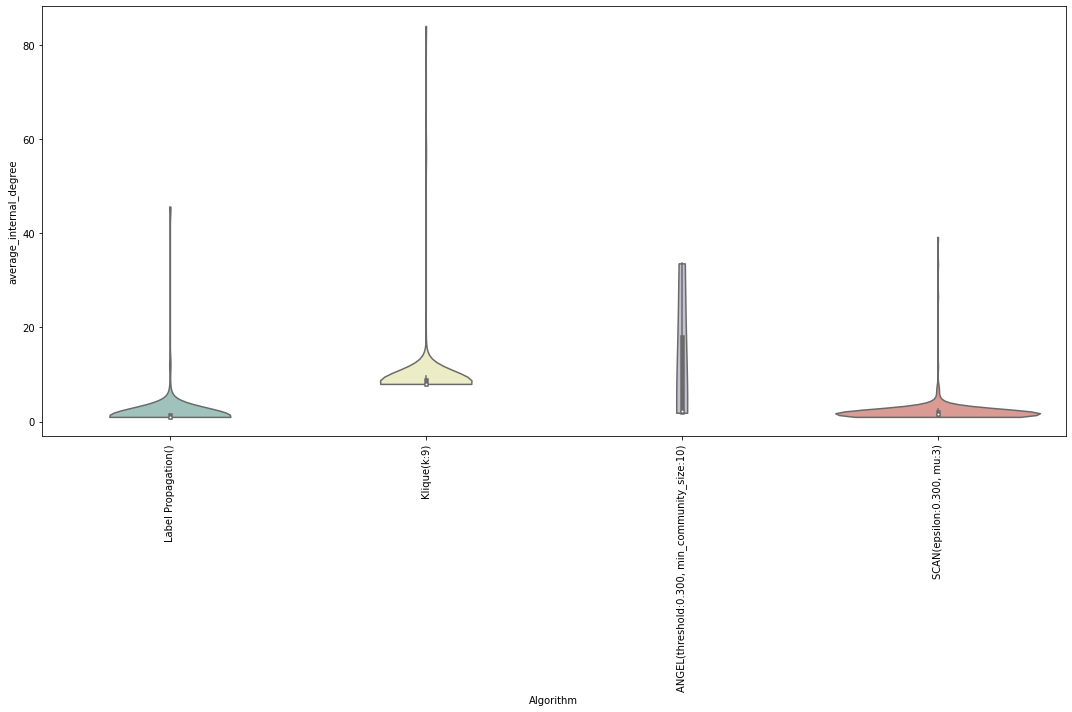

In [90]:
plt.figure(figsize=(15, 10))
viz.plot_com_stat([lp, kc, angel, scan_c], evaluation.average_internal_degree)

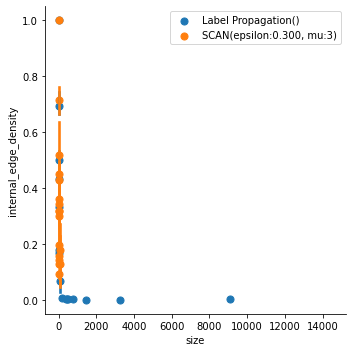

In [86]:
viz.plot_com_properties_relation([lp, scan_c], evaluation.size, evaluation.internal_edge_density)

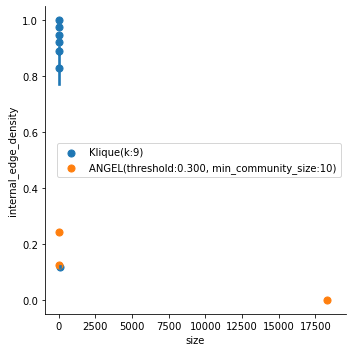

In [87]:
viz.plot_com_properties_relation([kc, angel], evaluation.size, evaluation.internal_edge_density)

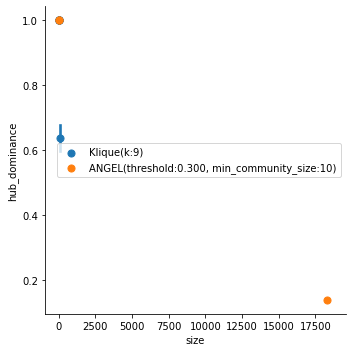

In [88]:
viz.plot_com_properties_relation([kc, angel], evaluation.size, evaluation.hub_dominance)

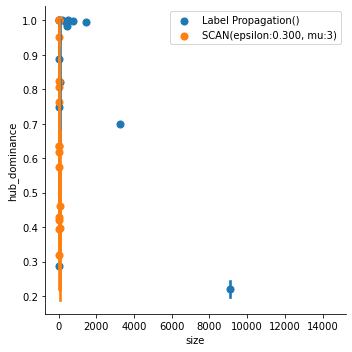

In [80]:
viz.plot_com_properties_relation([lp, scan_c], evaluation.size, evaluation.hub_dominance)